In [ ]:
import datetime

apalis = {
    "alpha": ["/home/tjw/Downloads/apalis/GPS-alpha01.csv", "/home/tjw/Downloads/apalis/GPS-alpha02sorted.csv", "/home/tjw/Downloads/apalis/GPS-zeta01sorted.csv", "/home/tjw/Downloads/apalis/GPS-zeta02sorted.csv", "/home/tjw/Downloads/apalis/GPS-zeta03sorted.csv"],
    "beta": ["/home/tjw/Downloads/apalis/GPS-beta01sorted.csv", "/home/tjw/Downloads/apalis/GPS-eta02sorted.csv"],
    "gamma": ["/home/tjw/Downloads/apalis/GPS-gamma01.csv"],
    "delta": ["/home/tjw/Downloads/apalis/GPS-delta01sorted.csv"],
    #"epsilon": [],
    #"zeta": [],
    #"eta": []
}
apalis_output = "/home/tjw/Downloads/apalis/sessions.json"

gopro = {
    "alpha": ["/home/tjw/Documents/gopro/alpha_json", "/home/tjw/Documents/gopro/zeta_json"],
    "beta": ["/home/tjw/Documents/gopro/beta_json", "/home/tjw/Documents/gopro/eta_json"],
    "gamma": ["/home/tjw/Documents/gopro/gamma_json", "/home/tjw/Documents/gopro/epsilon_json"],
    "delta": ["/home/tjw/Documents/gopro/delta_json"],
    #"epsilon": [],
    #"zeta": [],
    #"eta": []
}

canbus = {
    "apalis1": "/home/tjw/Documents/apalis23/apalis1-DEL_ETA.sql",
    "apalis2g": "/home/tjw/Documents/apalis23/apalis2-GAMMA.sql",
    "apalis2z1": "/home/tjw/Documents/apalis23/apalis2-ZETA1.sql",
    "apalis2z3": "/home/tjw/Documents/apalis23/apalis2-ZETA3.sql",
    "apalis3a": "/home/tjw/Documents/apalis23/apalis3-ALPHA.sql",
   #"apalis3e": "/home/tjw/Documents/apalis23/apalis3-ETA.sql",
    "apalis4a": "/home/tjw/Documents/apalis23/apalis4-ALPHA.sql",
   #"apalis4e": "/home/tjw/Documents/apalis23/apalis4-EPSILON.sql",
   #"apalis5b": "/home/tjw/Documents/apalis23/apalis5-BETA.sql",
    "apalis5z": "/home/tjw/Documents/apalis23/apalis5-ZETA.sql"
}

isoblue = {
    "alpha": { # merged with zeta
        "apalis3a": {"start": datetime.datetime(2023, 5,19),
                     "end":   datetime.datetime(2023, 5,24)},
        "apalis4a": {"start": datetime.datetime(2023, 5,25),
                     "end":   datetime.datetime(2023, 6,16)},
        "apalis2z1":{"start": datetime.datetime(2023, 8,19),
                     "end":   datetime.datetime(2023, 8,30)},
        "apalis5z": {"start": datetime.datetime(2023, 8,30),
                     "end":   datetime.datetime(2023, 9,15)},
        "apalis2z3":{"start": datetime.datetime(2023, 9,15),
                     "end":   datetime.datetime(2023,10,21)}
    },

    "beta": { # merged with eta
        # "apalis5b": {"start": datetime.datetime(2023, 5,25),
        #              "end":   datetime.datetime(2023, 6,23)},
        # "apalis3e": {"start": datetime.datetime(2023, 8,19),
        #              "end":   datetime.datetime(2023, 9,23)},
        "apalis1":  {"start": datetime.datetime(2023, 9,23),
                     "end":   datetime.datetime(2023,10,21)}
    },

    "gamma": { # merged with epsilon
        "apalis2g": {"start": datetime.datetime(2023, 5,25),
                     "end":   datetime.datetime(2023, 6,24)},
        # "apalis4e": {"start": datetime.datetime(2023, 8, 1),
        #              "end":   datetime.datetime(2023,10,21)}
    },

    "delta": { # not merged with any others
        "apalis1": {"start": datetime.datetime(2023, 5,25),
                    "end":   datetime.datetime(2023, 6,16)}
    }
}


maintenance = [ # all the dates of data swaps
    datetime.datetime(2023, 5, 9),
    datetime.datetime(2023, 5,19),
    datetime.datetime(2023, 5,25),
    datetime.datetime(2023, 6,16),
    datetime.datetime(2023, 6,23),
    datetime.datetime(2023, 8,19),
    datetime.datetime(2023, 8,30),
    datetime.datetime(2023, 9,15),
    datetime.datetime(2023, 9,23),
    datetime.datetime(2023,10,20)
]

In [2]:
# Read Isoblue GPS data
from dateutil import parser
import numpy as np
ZERO = datetime.timedelta(0)

a_data = {}

for tractor in apalis:
    a_data[tractor] = {
        "datetime":[],
        "lat":[],
        "long":[],
        # "deltas": {}
    }
    for csv in apalis[tractor]:
        print(f"Parsing {csv} ...")
        with open(csv) as file:
            first = True
            for line in file.readlines()[1:]:
                # Parse data from CSV
                time, lat, lng = line.split(",")
                lat = float(lat)
                lng = float(lng.rstrip())
                time = parser.isoparse(time)
                
                # Add data to dict
                a_data[tractor]["datetime"].append(time)
                a_data[tractor]["lat"].append(lat)
                a_data[tractor]["long"].append(lng)
                
                # Calculate deltas
                # if first:
                #     otime = time
                #     first = False
                # else:
                #     dtime = time - otime
                #     if dtime < ZERO: # WARN if csv is not strictly monotonic
                #         print(f"[NEGATIVE DELTA!]: {dtime} found at '{line}'")
                #     otime = time
                #     # a_data[tractor]["deltas"][time] = np.float32(dtime.total_seconds())


Parsing /home/tjw/Downloads/apalis/GPS-alpha01.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-alpha02sorted.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-zeta01sorted.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-zeta02sorted.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-zeta03sorted.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-beta01sorted.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-eta02sorted.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-gamma01.csv ...
Parsing /home/tjw/Downloads/apalis/GPS-delta01sorted.csv ...


In [ ]:
import pandas as pd

def extract_data(tractor, start, end):
    df = pd.DataFrame({
        "time": a_data[tractor]["datetime"][start:end],
        "lat": a_data[tractor]["lat"][start:end],
        "lon":  a_data[tractor]["long"][start:end]
    }) # N.B: python slices are start-inclusive, end-exclusive
    return df, end

In [ ]:
a_tracks = {}
import pandas as pd
threshold_session = 5*60 # can spline together if less than this
threshold_track = 60 # can lin-interp together if less than this
threshold_cont = 1.4 # fuzzy 1 Hz requirement for continuous run

for tractor in a_data:
    a_tracks[tractor] = [
        # nested lists: [session][track][frame]
    ]
    
    sx = 0
    for i in range(1, len(a_data[tractor]["datetime"])):
        delta = (a_data[tractor]["datetime"][i]
               - a_data[tractor]["datetime"][i-1]).total_seconds()
        if delta > threshold_cont:
            df = pd.DataFrame({
                "time": a_data[tractor]["datetime"][sx:i],
                "lat": a_data[tractor]["lat"][sx:i],
                "lon":  a_data[tractor]["long"][sx:i]
            }) # N.B: python slices are start-inclusive, end-exclusive
            
            if len(a_tracks[tractor]) > 0:
                time = df["time"].iloc[0]
                otime = a_tracks[tractor][-1][-1][-1]["time"].iloc[-1]
                delta = (time - otime).total_seconds()

            if (delta > threshold_track) or (len(a_tracks[tractor]) == 0):
                if (delta > threshold_session) or (len(a_tracks[tractor]) == 0):
                    # New Session
                    a_tracks[tractor].append([[df.copy()]])
                else:
                    # New Track for last session
                    a_tracks[tractor][-1].append([df.copy()])
            else:
                # New Frame for last track of last session
                a_tracks[tractor][-1][-1].append(df.copy())
            
            # Reset starting point for next frame
            sx =  i


In [5]:
for tractor in a_tracks:
    print(f"Tractor {tractor} has {len(a_tracks[tractor])} sessions:")
    for session in range(len(a_tracks[tractor])):
        print(f" - Session {session} has {len(a_tracks[tractor][session])} tracks:")
        for track in range(len(a_tracks[tractor][session])):
            print(f"   - Track {track} has {len(a_tracks[tractor][session][track])} frames")

Tractor alpha has 40 sessions:
 - Session 0 has 3 tracks:
   - Track 0 has 185 frames
   - Track 1 has 76 frames
   - Track 2 has 426 frames
 - Session 1 has 2 tracks:
   - Track 0 has 82 frames
   - Track 1 has 548 frames
 - Session 2 has 6 tracks:
   - Track 0 has 116 frames
   - Track 1 has 21 frames
   - Track 2 has 10 frames
   - Track 3 has 11 frames
   - Track 4 has 314 frames
   - Track 5 has 74 frames
 - Session 3 has 10 tracks:
   - Track 0 has 42 frames
   - Track 1 has 209 frames
   - Track 2 has 5 frames
   - Track 3 has 4 frames
   - Track 4 has 9 frames
   - Track 5 has 35 frames
   - Track 6 has 10 frames
   - Track 7 has 4 frames
   - Track 8 has 2 frames
   - Track 9 has 12 frames
 - Session 4 has 3 tracks:
   - Track 0 has 1 frames
   - Track 1 has 1 frames
   - Track 2 has 1 frames
 - Session 5 has 2 tracks:
   - Track 0 has 2 frames
   - Track 1 has 1 frames
 - Session 6 has 11 tracks:
   - Track 0 has 22 frames
   - Track 1 has 19 frames
   - Track 2 has 16 frames

In [ ]:
for tractor in a_tracks:
    deltas = []
    for session in range(1, len(a_tracks[tractor])):
        # first timestamp in current session
        time = a_tracks[tractor][session][0][0]["time"].iloc[0]
        
        # last timestamp in previous session
        otime = a_tracks[tractor][session - 1][-1][-1]["time"].iloc[-1]
        
        delta = (time - otime).total_seconds()
        deltas.append(delta)
      
        if delta < threshold_session:
            print(f"Tractor {tractor} started session {session} after only {delta:0.0f}s")
            # print(f" * {otime} -> {time}")
    
    print(f"Tractor {tractor} has avg/med delta of {np.mean(deltas):0.0f}/{np.median(deltas):0.0f} seconds between sessions")


Tractor alpha has avg/med delta of 252524/1540 seconds between sessions
Tractor beta has avg/med delta of 135685/6344 seconds between sessions
Tractor gamma has avg/med delta of 116002/7064 seconds between sessions
Tractor delta has avg/med delta of 196847/2431 seconds between sessions


In [7]:
for tractor in a_tracks:
    for session in range(len(a_tracks[tractor])):
        deltas = []
        for track in range(1, len(a_tracks[tractor][session])):
            # first timestamp in current track
            time = a_tracks[tractor][session][track][0]["time"].iloc[0]

            # last timestamp in previous track
            otime = a_tracks[tractor][session][track - 1][-1]["time"].iloc[-1]

            delta = (time - otime).total_seconds()
            deltas.append(delta)
            
            if delta < threshold_track:
                print(f"Tractor {tractor} started s:t {session}:{track} after only {delta:0.0f}s")
                # print(f" * {otime} -> {time}")
    
        print(f"Tractor {tractor}, Session {session} has avg/med delta of {np.mean(deltas):0.0f}/{np.median(deltas):0.0f} seconds between tracks")


Tractor alpha, Session 0 has avg/med delta of 113/113 seconds between tracks
Tractor alpha, Session 1 has avg/med delta of 232/232 seconds between tracks
Tractor alpha, Session 2 has avg/med delta of 113/130 seconds between tracks
Tractor alpha, Session 3 has avg/med delta of 144/143 seconds between tracks
Tractor alpha, Session 4 has avg/med delta of 166/166 seconds between tracks
Tractor alpha, Session 5 has avg/med delta of 190/190 seconds between tracks
Tractor alpha, Session 6 has avg/med delta of 142/142 seconds between tracks
Tractor alpha, Session 7 has avg/med delta of 136/136 seconds between tracks
Tractor alpha, Session 8 has avg/med delta of 143/144 seconds between tracks
Tractor alpha, Session 9 has avg/med delta of nan/nan seconds between tracks
Tractor alpha, Session 10 has avg/med delta of 150/147 seconds between tracks
Tractor alpha, Session 11 has avg/med delta of 140/140 seconds between tracks
Tractor alpha, Session 12 has avg/med delta of 144/144 seconds between tra

/home/tjw/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tjw/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [8]:
for tractor in a_tracks:
    for session in range(len(a_tracks[tractor])):
        for track in range(len(a_tracks[tractor][session])):
            if len(a_tracks[tractor][session][track]) > 1:
                trackframes = [a_tracks[tractor][session][track][0]]
                for frame in range(1, len(a_tracks[tractor][session][track])):
                    # last timestamp in previous frame
                    otime = a_tracks[tractor][session][track][frame - 1]["time"].iloc[-1]

                    # first timestamp in next frame
                    time = a_tracks[tractor][session][track][frame]["time"].iloc[0]

                    # create an interstitial frame
                    times_array = np.arange(otime, time, datetime.timedelta(seconds=1))[1:]
                    link = pd.DataFrame({
                        "time": times_array,
                        "lat": np.linspace(a_tracks[tractor][session][track][frame-1]["lat"].iloc[-1],
                                           a_tracks[tractor][session][track][frame]["lat"].iloc[0],
                                           num=len(times_array)),
                        "lon": np.linspace(a_tracks[tractor][session][track][frame-1]["lon"].iloc[-1],
                                             a_tracks[tractor][session][track][frame]["lon"].iloc[0],
                                           num=len(times_array))
                    })

                    # Add lin-interp frame and next frame to the stack
                    trackframes.append(link)
                    trackframes.append(a_tracks[tractor][session][track][frame])
                
                a_tracks[tractor][session][track] = pd.concat(trackframes, ignore_index=True)
            else:
                a_tracks[tractor][session][track] = a_tracks[tractor][session][track][0]
                


/tmp/ipykernel_283546/414502886.py:14: UserWarning: no explicit representation of timezones available for np.datetime64
  times_array = np.arange(otime, time, datetime.timedelta(seconds=1))[1:]


In [ ]:
output = a_tracks[tractor][session][track]
output

,time,lat,lon
0,2023-06-06 12:38:19+00:00,40.004784,-85.781698
1,2023-06-06 12:38:20+00:00,40.004783,-85.781697
2,2023-06-06 12:38:21+00:00,40.004783,-85.781697
3,2023-06-06 12:38:22+00:00,40.004783,-85.781697
4,2023-06-06 12:38:23+00:00,40.004782,-85.781697
...,...,...,...
3950,2023-06-06 13:44:09+00:00,40.005401,-85.781854
3951,2023-06-06 13:44:10+00:00,40.005404,-85.781856
3952,2023-06-06 13:44:11+00:00,40.005405,-85.781858
3953,2023-06-06 13:44:12+00:00,40.005407,-85.781862


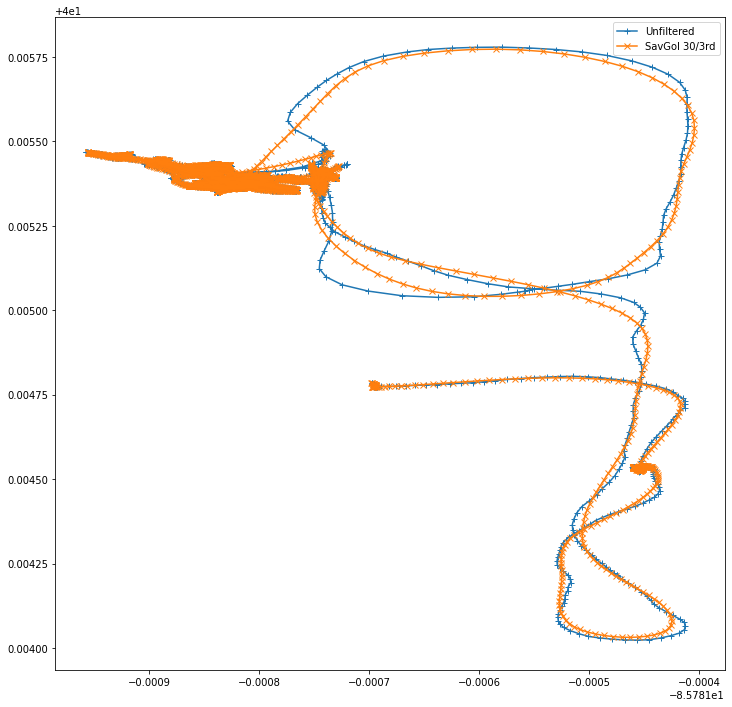

In [10]:
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4]) # https://codegolf.stackexchange.com/a/4712

# hyperparams found by trial and error
poly_order = 3
window_size = 30

plt.figure(figsize=(12,12))
plt.plot(output["lon"], output["lat"], label="Unfiltered", marker="+")
plt.plot(
    savgol_filter(output["lon"], window_size, poly_order),
    savgol_filter(output["lat"], window_size, poly_order),
    label=f"SavGol {window_size}/{ordinal(poly_order)}",
    marker="x"#, alpha=0.3
)

plt.legend()

In [11]:
import haversine

distance = [0]
for row in range(1, len(output)):
    old_gps = (output["lat"].iloc[row-1], output["lon"].iloc[row-1])
    new_gps = (output["lat"].iloc[row], output["lon"].iloc[row])
    distance.append(haversine.haversine(old_gps, new_gps, haversine.Unit.METERS))

output["speed"] = distance # in m/s, because ["time"] is at 1 Hz
    

In [ ]:
filtered_lat = savgol_filter(output["lat"], window_size, poly_order)
filtered_lon = savgol_filter(output["lon"], window_size, poly_order)

distance = [0]
for row in range(1, len(output)):
    old_gps = (filtered_lat[row-1], filtered_lon[row-1])
    new_gps = (filtered_lat[row], filtered_lon[row])
    distance.append(haversine.haversine(old_gps, new_gps, haversine.Unit.METERS))

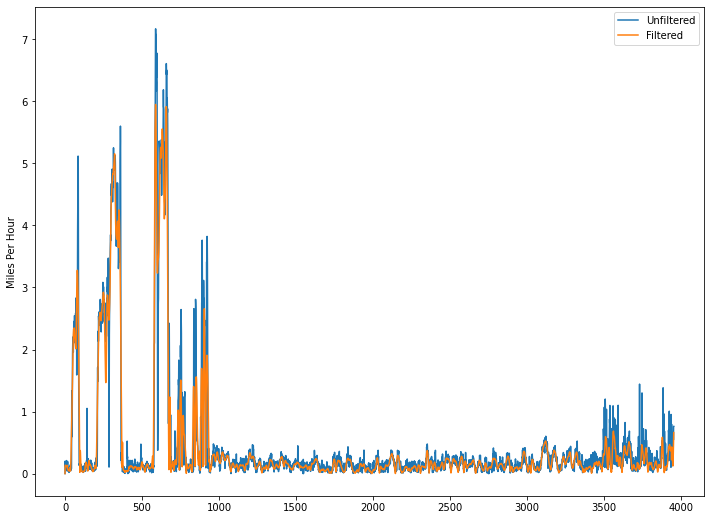

In [13]:
plt.figure(figsize=(12,9))
plt.plot(output["speed"]*2.23694, label="Unfiltered")
plt.plot(np.array(distance)*2.23694, label="Filtered")
plt.ylabel("Miles Per Hour")
plt.legend()

In [30]:
b_data = {}
from scipy.interpolate import RBFInterpolator

# hyperparams chosen by trial and error
window_size = 30
fit_points = 5
spline_smoothing = 0.000000001

for tractor in a_tracks:
    b_data[tractor] = []
    for session in range(len(a_tracks[tractor])):
        s_tracks = [a_tracks[tractor][session][0]]
        if len(a_tracks[tractor][session]) > 1:
            for track in range(1, len(a_tracks[tractor][session])):
                # Smooth surrounding tracks
                old_track = a_tracks[tractor][session][track - 1].copy()
                if len(old_track["lat"]) >= window_size:
                    old_track["lat"] = savgol_filter(old_track["lat"], window_size, 3)
                    old_track["lon"] = savgol_filter(old_track["lon"], window_size, 3)
                
                new_track = a_tracks[tractor][session][track].copy()
                if len(new_track["lat"]) >= window_size:
                    new_track["lat"] = savgol_filter(new_track["lat"], window_size, 3)
                    new_track["lon"] = savgol_filter(new_track["lon"], window_size, 3)
                
                # Get datetimes for interstitial frame
                old_times = old_track["time"].iloc[-fit_points:].to_list()
                new_times = new_track["time"].iloc[:fit_points].to_list()
                link_times = np.arange(old_times[-1], new_times[0], datetime.timedelta(seconds=1))[1:]
                link_times = [pd.to_datetime(x).value for x in link_times]
                old_times = [pd.to_datetime(x).value for x in old_times]
                new_times = [pd.to_datetime(x).value for x in new_times]
                
                # Stitch tracks together with multiquadric splines
                old_lat = old_track["lat"].iloc[-fit_points:].to_list()
                new_lat = new_track["lat"].iloc[:fit_points].to_list()
                old_lon = old_track["lon"].iloc[-fit_points:].to_list()
                new_lon = new_track["lon"].iloc[:fit_points].to_list()
                
                link_interp = RBFInterpolator(
                    y= np.array(old_times+new_times).reshape(-1,1),
                    d = np.array([old_lon+new_lon, old_lat+new_lat]).T,
                    kernel = "multiquadric",
                    epsilon = spline_smoothing
                )
                link_mat = link_interp(np.array(link_times).reshape(-1,1))
                link_lon = link_mat[:,0]
                link_lat = link_mat[:,1]
                
                # Create interstitial dataframe and add to stack
                link = pd.DataFrame({
                    "time": [pd.to_datetime(x) for x in link_times],
                    "lat": link_lat,
                    "lon": link_lon
                })
                s_tracks.append(link)
                s_tracks.append(new_track)
            
            b_data[tractor].append(pd.concat(s_tracks, ignore_index=True))
        else:
            new_track = a_tracks[tractor][session][0].copy()
            if len(new_track["lat"]) >= window_size:
                new_track["lat"] = savgol_filter(new_track["lat"], window_size, 3)
                new_track["lon"] = savgol_filter(new_track["lon"], window_size, 3)
            b_data[tractor].append(new_track)                


/tmp/ipykernel_283546/2906301813.py:29: UserWarning: no explicit representation of timezones available for np.datetime64
  link_times = np.arange(old_times[-1], new_times[0], datetime.timedelta(seconds=1))[1:]


In [48]:
longest = datetime.timedelta(1)

for tractor in b_data:
    print(f"Tractor {tractor} has {len(b_data[tractor])} sessions:")
    for session in range(len(b_data[tractor])):
        lasted = datetime.timedelta(seconds=len(b_data[tractor][session]))
        print(f" - Session {session} lasted {lasted}")
        if lasted > longest:
            longest = lasted
            l_tractor = tractor
            l_session = session

Tractor alpha has 40 sessions:
 - Session 0 lasted 1 day, 0:41:09
 - Session 1 lasted 22:37:07
 - Session 2 lasted 1 day, 13:23:15
 - Session 3 lasted 4 days, 21:31:25
 - Session 4 lasted 2:41:34
 - Session 5 lasted 0:40:51
 - Session 6 lasted 1 day, 20:33:39
 - Session 7 lasted 0:30:10
 - Session 8 lasted 13:54:14
 - Session 9 lasted 0:19:03
 - Session 10 lasted 19:16:54
 - Session 11 lasted 2 days, 12:16:44
 - Session 12 lasted 14:27:12
 - Session 13 lasted 0:17:57
 - Session 14 lasted 0:09:34
 - Session 15 lasted 2:19:28
 - Session 16 lasted 1:20:46
 - Session 17 lasted 20:39:49
 - Session 18 lasted 0:11:51
 - Session 19 lasted 0:36:29
 - Session 20 lasted 0:03:33
 - Session 21 lasted 1:56:36
 - Session 22 lasted 1 day, 1:00:46
 - Session 23 lasted 15:03:36
 - Session 24 lasted 0:45:45
 - Session 25 lasted 0:03:36
 - Session 26 lasted 2 days, 16:37:42
 - Session 27 lasted 1:17:59
 - Session 28 lasted 1:24:08
 - Session 29 lasted 17:53:20
 - Session 30 lasted 0:03:47
 - Session 31 la

In [49]:
print(f"Shortest >3min session was tractor {l_tractor}'s #{l_session} at {longest}")

Shortest >3min session was tractor alpha's #37 at 9 days, 23:48:24


Plotted 863304 points


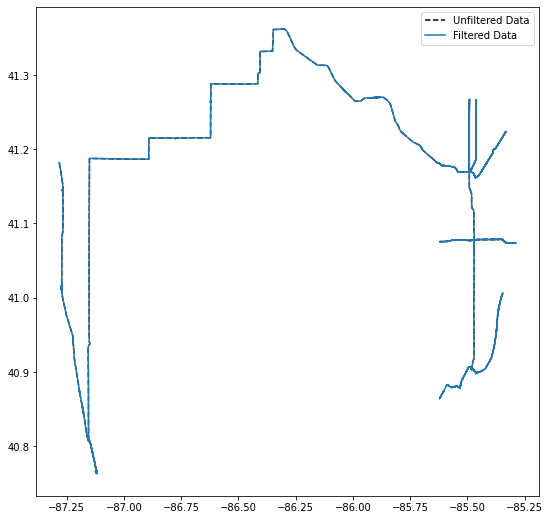

In [50]:
plt.figure(figsize=(9,9))
plt.plot(a_tracks[l_tractor][l_session][0]["lon"], a_tracks[l_tractor][l_session][0]["lat"], color="k", label="Unfiltered Data", linestyle="--")
plt.plot(b_data[l_tractor][l_session]["lon"], b_data[l_tractor][l_session]["lat"], label="Filtered Data")
plt.legend()
print(f"Plotted {len(b_data[l_tractor][l_session]['lat'])} points")

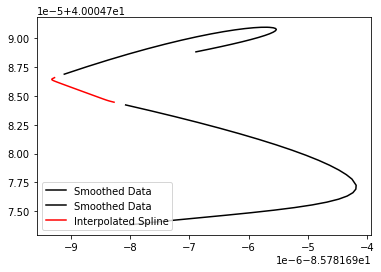

In [51]:
for t in [old_track.iloc[-30:], new_track.iloc[:30]]:
    plt.plot(t["lon"], t["lat"], color="black", label="Smoothed Data")
plt.plot(link["lon"], link["lat"], color="red", label="Interpolated Spline")
plt.legend()